In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

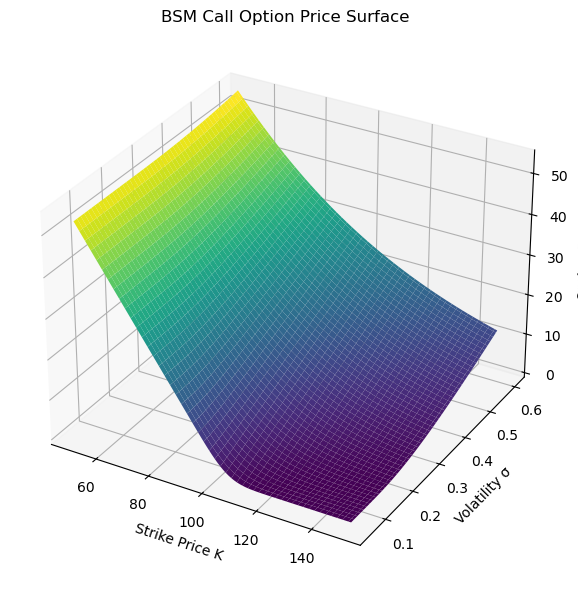

In [3]:
S = 100
T = 1
r = 0.05

strikes = np.linspace(50, 150, 100)
vols = np.linspace(0.05, 0.6, 100)
K_grid, sigma_grid = np.meshgrid(strikes, vols)

price_surface = black_scholes_price(S, K_grid, T, r, sigma_grid, option_type='call')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_grid, sigma_grid, price_surface, cmap='viridis')

ax.set_xlabel('Strike Price K')
ax.set_ylabel('Volatility σ')
ax.set_zlabel('Option Price')
ax.set_title('BSM Call Option Price Surface')
plt.tight_layout()
plt.show()

In [4]:
def compute_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) 
             - r * K * np.exp(-r*T) * norm.cdf(d2))
    rho = K * T * np.exp(-r*T) * norm.cdf(d2)
    
    return delta, gamma, vega, theta, rho

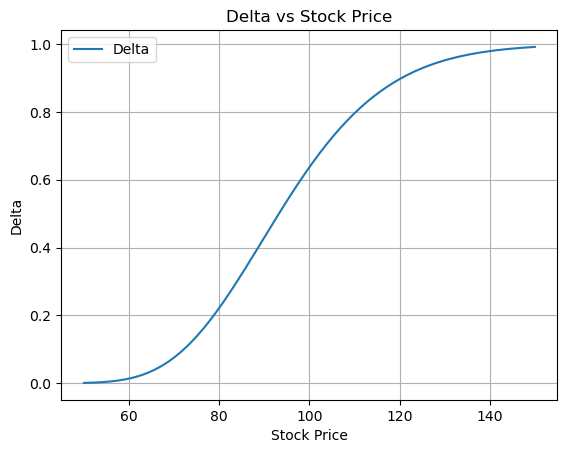

In [5]:
S_vals = np.linspace(50, 150, 200)
greeks = [compute_greeks(S, 100, 1, 0.05, 0.2)[0] for S in S_vals]

plt.plot(S_vals, greeks, label='Delta')
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta vs Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
import sympy as sp

t, S, sigma, r = sp.symbols('t S sigma r')
V = sp.Function('V')(S, t)  # option value function

# Partial derivatives
dVdS  = sp.diff(V, S)
dVdSS = sp.diff(dVdS, S)
dVdt  = sp.diff(V, t)

# Ito's Lemma on dV
dV = dVdt + r * S * dVdS + 0.5 * sigma**2 * S**2 * dVdSS

# BSM PDE: dVdt + 0.5*sigma^2*S^2*d2VdS2 + r*S*dVdS - r*V = 0
BSM_PDE = dVdt + 0.5 * sigma**2 * S**2 * dVdSS + r * S * dVdS - r * V
sp.pprint(BSM_PDE)

           2                                                      
     2  2 ∂                  ∂                         ∂          
0.5⋅S ⋅σ ⋅───(V(S, t)) + S⋅r⋅──(V(S, t)) - r⋅V(S, t) + ──(V(S, t))
            2                ∂S                        ∂t         
          ∂S                                                      
